# Analisis EDA

In [81]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Importamos los datos
data = pd.read_csv('../Data/Salary_Data.csv')

data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### VARIABLES:

- Age: Edad
- Gender: Sexo
- Education Level: Máxima nivel titulacion cursada
- Job Title: Nombre del trabajo que ejercen
- Years of Experience: años de experiencia
- Salary: Salario del trabajador

### Tratado de nulos

In [83]:
data.isnull().sum(), data.shape[0]

(Age                    2
 Gender                 2
 Education Level        3
 Job Title              2
 Years of Experience    3
 Salary                 5
 dtype: int64,
 6704)

Eliminamos las filas que tienen nulos ya que disponemos de muchos datos (6704) y no queremos inventarlos y crear ruido.

In [84]:
data_cleaned = data.dropna(subset=['Salary', 'Education Level'])

In [85]:
data_cleaned.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## AGE

<Axes: xlabel='Age'>

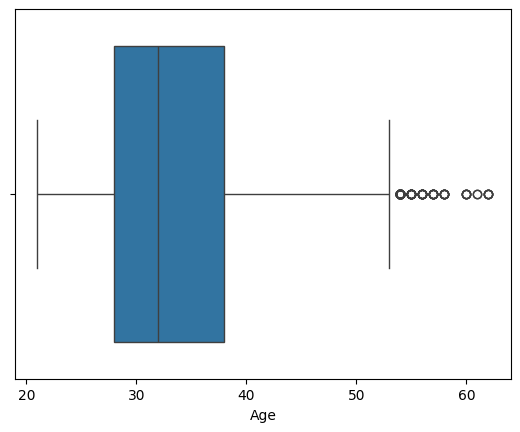

In [86]:
sns.boxplot(data=data_cleaned, x='Age')

Aunque la mayoria de los trabajores va desde los 20 años hasta los 50 años es lo normal ya que son trabajos relativamente nuevos y por tanto raro que haya gente mayor a 50 años. En este caso dejaremos los datos atipicos.

## Gender

<Axes: xlabel='Gender', ylabel='count'>

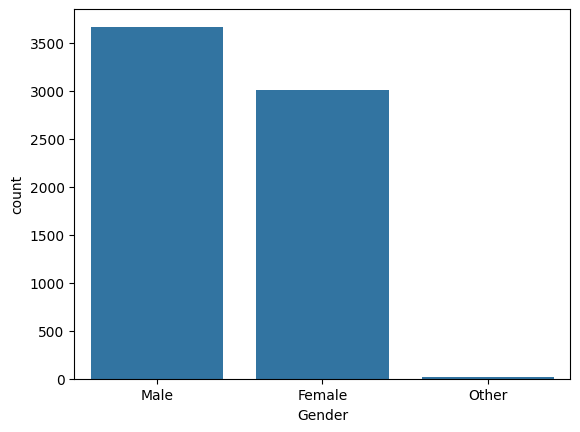

In [87]:
sns.countplot(data_cleaned, x='Gender')

## Education Level

<Axes: xlabel='Education Level', ylabel='count'>

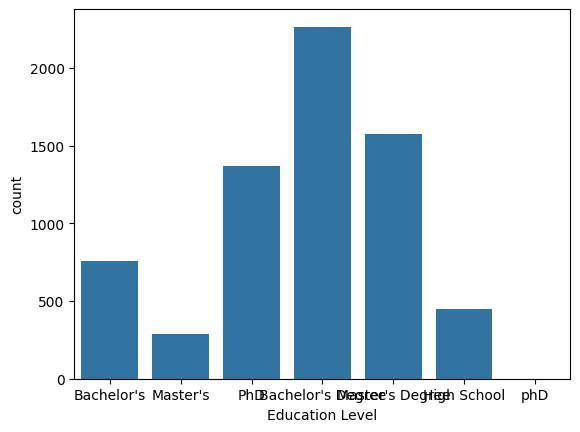

In [88]:
sns.countplot(data=data_cleaned, x='Education Level')

In [89]:
data_cleaned["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

Vamos a reescribir las variables ya que hay varias formas escritas.

In [90]:
data_cleaned["Education Level"] = data_cleaned["Education Level"].replace({'phD': 'PhD', "Bachelor's Degree": "Bachelor's", "Master's Degree": "Master's"})

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_33032\3903775992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Education Level"] = data_cleaned["Education Level"].replace({'phD': 'PhD', "Bachelor's Degree": "Bachelor's", "Master's Degree": "Master's"})


<Axes: xlabel='Education Level', ylabel='count'>

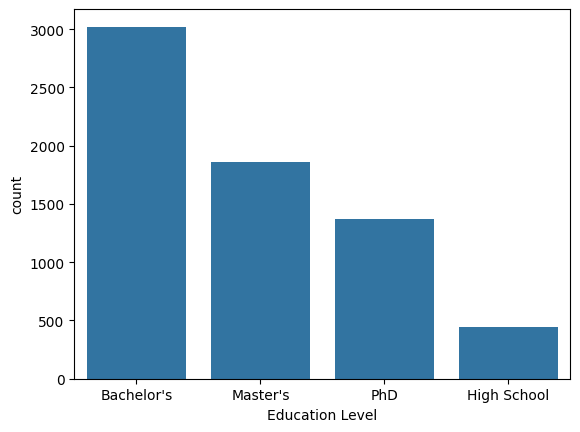

In [91]:
sns.countplot(data=data_cleaned, x='Education Level')

Hay un pequeño desbalanceo de clases. Cosa tenemos en cuenta si requiere.

## Job Title

In [92]:
data_cleaned["Job Title"].unique()[:10]

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist'], dtype=object)

In [93]:
data_cleaned['Job Title'] = data_cleaned['Job Title'].astype(str)

def categorize_job_title(title):
    if title.startswith('Senior'):
        return 'Senior'
    elif title.startswith('Junior'):
        return 'Junior'
    else:
        return 'Regular'

data_cleaned['Job Category'] = data_cleaned['Job Title'].apply(categorize_job_title)
data_cleaned['Job Title'] = data_cleaned['Job Title'].str.replace('Senior', '').str.replace('Junior', '').str.strip()
print(data_cleaned[['Job Title', 'Job Category']].head())


           Job Title Job Category
0  Software Engineer      Regular
1       Data Analyst      Regular
2            Manager       Senior
3    Sales Associate      Regular
4           Director      Regular


C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_33032\1539208503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Job Title'] = data_cleaned['Job Title'].astype(str)
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_33032\1539208503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Job Category'] = data_cleaned['Job Title'].apply(categorize_job_title)
C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_33032\1539208503.py:12: SettingWithCopyWarning: 
A value is trying to be

<Axes: xlabel='Job Category', ylabel='count'>

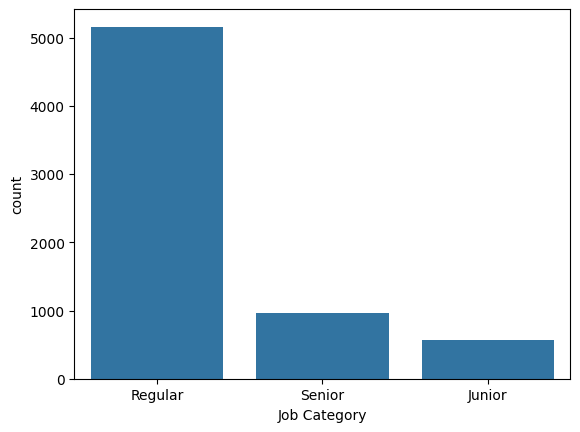

In [94]:
sns.countplot(data=data_cleaned, x='Job Category')

In [95]:
data_cleaned['Job Title'].value_counts()

Job Title
Software Engineer                 813
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64

In [96]:
# Filter out job titles that appear less than 10 times
job_title_counts = data_cleaned['Job Title'].value_counts()
job_titles_to_keep = job_title_counts[job_title_counts >= 20].index

# Keep only the rows with job titles that appear at least 10 times
data_cleaned = data_cleaned[data_cleaned['Job Title'].isin(job_titles_to_keep)]

row_count = len(data_cleaned)
print(f'The number of rows in the data is: {row_count}')

The number of rows in the data is: 6484


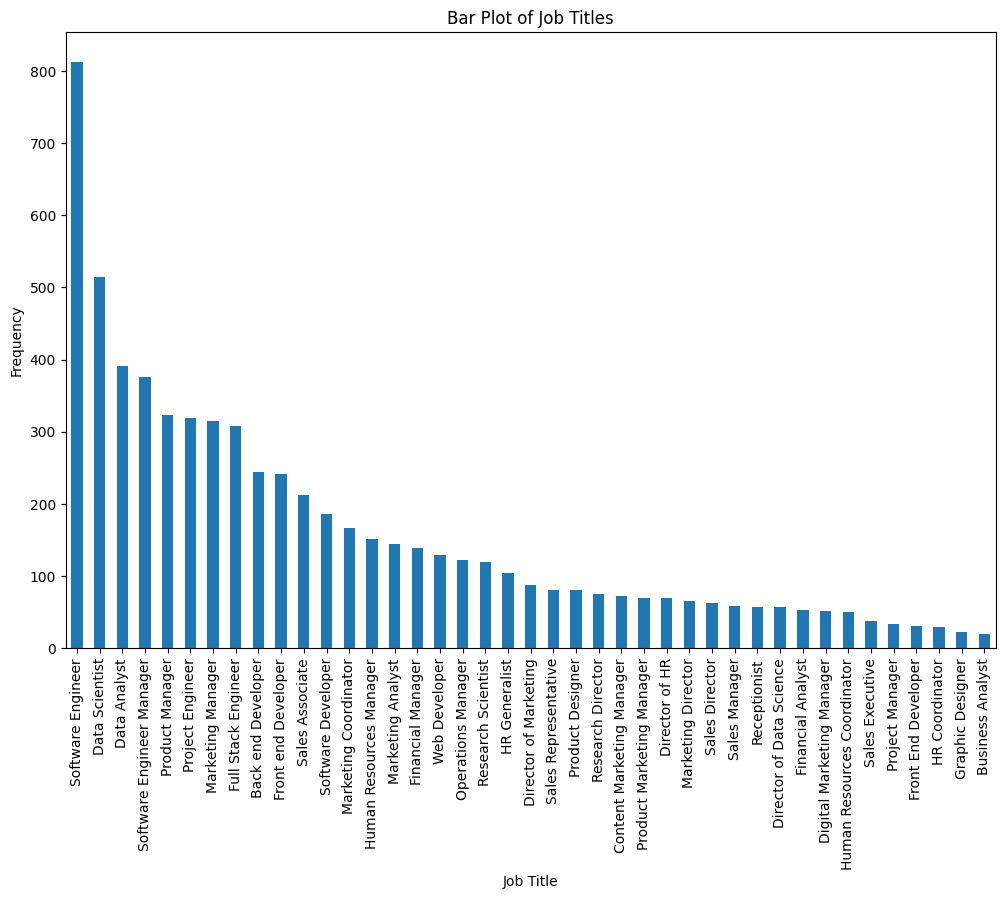

In [97]:
plt.figure(figsize=(12, 8))
data_cleaned['Job Title'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Years Of Experience

<Axes: xlabel='Years of Experience'>

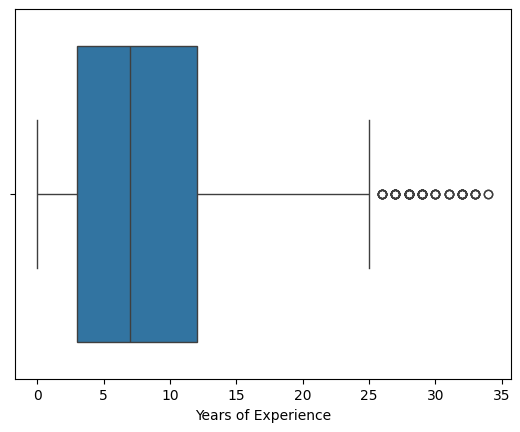

In [100]:
sns.boxplot(data=data_cleaned, x="Years of Experience")

Lo mismo con la edad.

## Salary

<Axes: xlabel='Years of Experience', ylabel='Salary'>

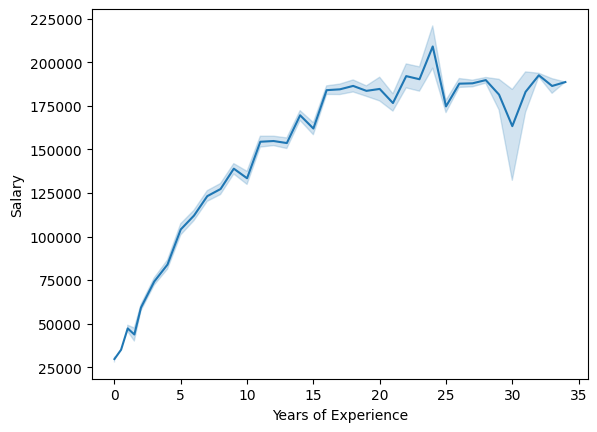

In [103]:
sns.lineplot(data=data_cleaned, x="Years of Experience", y="Salary")

<Axes: xlabel='Age', ylabel='Salary'>

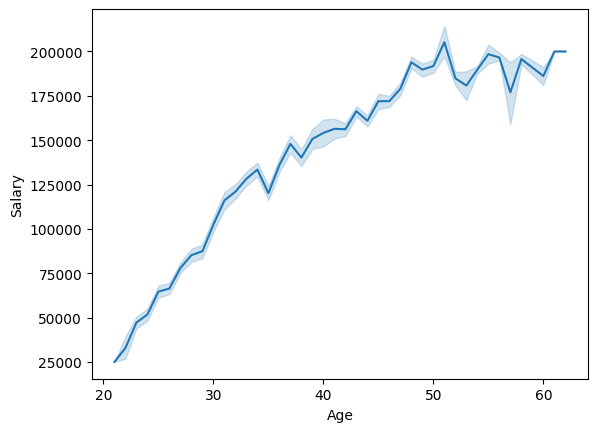

In [105]:
sns.lineplot(data=data_cleaned, x="Age", y="Salary")

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_33032\3857154125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=data_cleaned, palette='viridis')


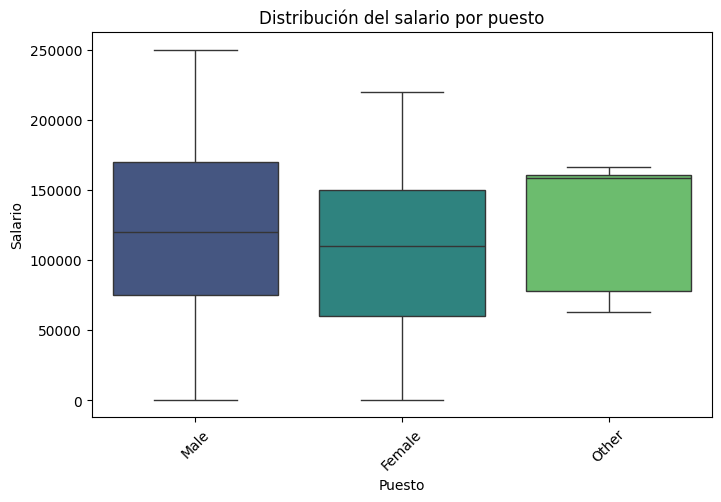

In [113]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Salary', data=data_cleaned, palette='viridis')
plt.title('Distribución del salario por puesto')
plt.xlabel('Puesto')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.show()

C:\Users\Pau Jorques\AppData\Local\Temp\ipykernel_33032\1596706557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Category', y='Salary', data=data_cleaned, palette='viridis')


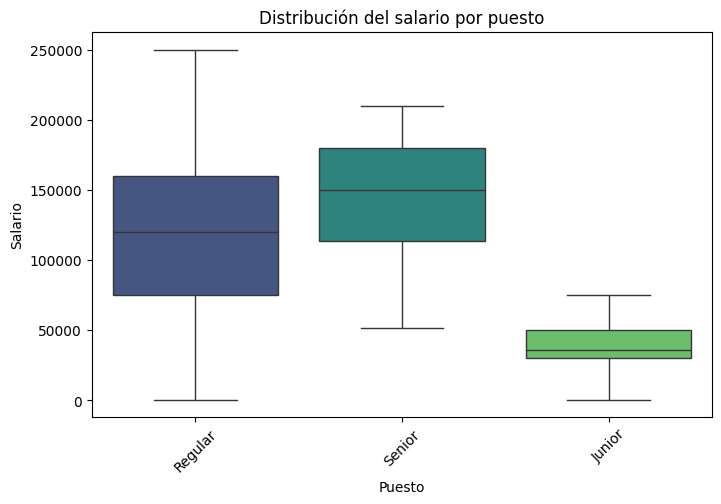

In [114]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Job Category', y='Salary', data=data_cleaned, palette='viridis')
plt.title('Distribución del salario por puesto')
plt.xlabel('Puesto')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.show()